# Electric vs Gas Vehicles in San Francisco Neighborhoods.

## 1. Data Wrangle

### A. Import California Vehicle CSV

In [691]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style="whitegrid", font_scale=2)

In [692]:
df = pd.read_csv('vehicle-count-as-of-1-1-2020.csv')

/Users/lanapalmer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [693]:
#Visual Check
df.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2020,90001,2007,Gasoline,ACURA,Light,15
1,1/1/2020,90002,2007,Gasoline,ACURA,Light,20
2,1/1/2020,90003,2007,Gasoline,ACURA,Light,29
3,1/1/2020,90004,2007,Gasoline,ACURA,Light,19
4,1/1/2020,90006,2007,Gasoline,ACURA,Light,15


In [694]:
#Visual Check
df.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
602389,1/1/2020,OOS,Unk,Gasoline,Unk,Heavy,98
602390,1/1/2020,90012,Unk,Gasoline,Unk,Light,12
602391,1/1/2020,93065,Unk,Gasoline,Unk,Light,11
602392,1/1/2020,95762,Unk,Gasoline,Unk,Light,12
602393,1/1/2020,OOS,Unk,Gasoline,Unk,Light,52


In [695]:
df.dtypes

Date          object
Zip Code      object
Model Year    object
Fuel          object
Make          object
Duty          object
Vehicles       int64
dtype: object

In [696]:
df['Zip Code'] = df['Zip Code'].astype(str)

In [697]:
df.dtypes

Date          object
Zip Code      object
Model Year    object
Fuel          object
Make          object
Duty          object
Vehicles       int64
dtype: object

In [698]:
df.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

### B. Import SF Zip Codes CSV

In [699]:
zips = pd.read_csv('zipcodesSF.csv')

In [700]:
zips.head()

,Zip Code,Neighborhood,Population (Census 2000)
0,94102,Hayes Valley/Tenderloin/North of Market,"28,991"
1,94103,South of Market,"23,016"
2,94107,Potrero Hill,"17,368"
3,94108,Chinatown,"13,716"
4,94109,Polk/Russian Hill (Nob Hill),"56,322"


In [701]:
zips.dtypes

Zip Code                     int64
Neighborhood                object
Population (Census 2000)    object
dtype: object

In [702]:
zips['Zip Code'] = zips['Zip Code'].astype(str)

In [703]:
zips.dtypes

Zip Code                    object
Neighborhood                object
Population (Census 2000)    object
dtype: object

### C. Create New Dataframe

> Create a dataframe that only includes San Francisco zip codes.

In [704]:
df1 = df[df['Zip Code'].isin(ziplist)]

In [705]:
df1.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
473,1/1/2020,94107,2007,Gasoline,ACURA,Light,16
474,1/1/2020,94109,2007,Gasoline,ACURA,Light,20
475,1/1/2020,94110,2007,Gasoline,ACURA,Light,29
476,1/1/2020,94112,2007,Gasoline,ACURA,Light,63
477,1/1/2020,94114,2007,Gasoline,ACURA,Light,16


In [706]:
df1.shape

(8695, 7)

> I'll now create a dictionary in order to map zip codes in my new dataframe to neighborhood names.

In [707]:
zip_dict = dict(zip(zips['Zip Code'], zips['Neighborhood']))
zip_dict

{'94102': 'Hayes Valley/Tenderloin/North of Market',
 '94103': 'South of Market',
 '94107': 'Potrero Hill',
 '94108': 'Chinatown',
 '94109': 'Polk/Russian Hill (Nob Hill)',
 '94110': 'Inner Mission/Bernal Heights',
 '94112': 'Ingelside-Excelsior/Crocker-Amazon',
 '94114': 'Castro/Noe Valley',
 '94115': 'Western Addition/Japantown',
 '94116': 'Parkside/Forest Hill',
 '94117': 'Haight-Ashbury',
 '94118': 'Inner Richmond',
 '94121': 'Outer Richmond',
 '94122': 'Sunset',
 '94123': 'Marina',
 '94124': 'Bayview-Hunters Point',
 '94127': 'St. Francis Wood/Miraloma/West Portal',
 '94131': 'Twin Peaks-Glen Park',
 '94132': 'Lake Merced',
 '94133': 'North Beach/Chinatown',
 '94134': 'Visitacion Valley/Sunnydale'}

### D. Create New Dataframe

In [708]:
df1['Neighborhood'] = df1['Zip Code'].map(zip_dict)
df1.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood
473,1/1/2020,94107,2007,Gasoline,ACURA,Light,16,Potrero Hill
474,1/1/2020,94109,2007,Gasoline,ACURA,Light,20,Polk/Russian Hill (Nob Hill)
475,1/1/2020,94110,2007,Gasoline,ACURA,Light,29,Inner Mission/Bernal Heights
476,1/1/2020,94112,2007,Gasoline,ACURA,Light,63,Ingelside-Excelsior/Crocker-Amazon
477,1/1/2020,94114,2007,Gasoline,ACURA,Light,16,Castro/Noe Valley


In [709]:
df1.tail()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood
602045,1/1/2020,94116,Unk,Gasoline,OTHER/UNK,Light,1,Parkside/Forest Hill
602046,1/1/2020,94118,Unk,Gasoline,OTHER/UNK,Light,1,Inner Richmond
602047,1/1/2020,94122,Unk,Gasoline,OTHER/UNK,Light,2,Sunset
602048,1/1/2020,94123,Unk,Gasoline,OTHER/UNK,Light,1,Marina
602049,1/1/2020,94127,Unk,Gasoline,OTHER/UNK,Light,1,St. Francis Wood/Miraloma/West Portal


## 2. Exploratory Data Analysis

While my main question is which neighorhood has the highest percentage of electric cars per capita, other questions are:
* What is the most popular car make in San Francisco?
* What are the overall counts of electric and gasoline vehicles in SF?
* Which neighborhood has the most number of vehicles?
   

### i. Car Make

In [710]:
makes = df1.groupby('Make').agg({'Vehicles': ['sum']})
makes.head()

,Vehicles
,sum
Make,
ACURA,8174
ALFA ROMEO,24
AUDI,11607
AUTOCAR,202
BMW,22261


In [711]:
# rename columns
makes.columns = ['Total']

# reset index to get grouped columns back
makes = makes.reset_index()

#Sort and Reset Index
makes.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Make,Total
0,TOYOTA,92923
1,HONDA,54560
2,OTHER/UNK,39015
3,FORD,26661
4,BMW,22261
...,...,...
61,MACK,23
62,STERLING,17
63,LODAL,15
64,KENWORTH,12


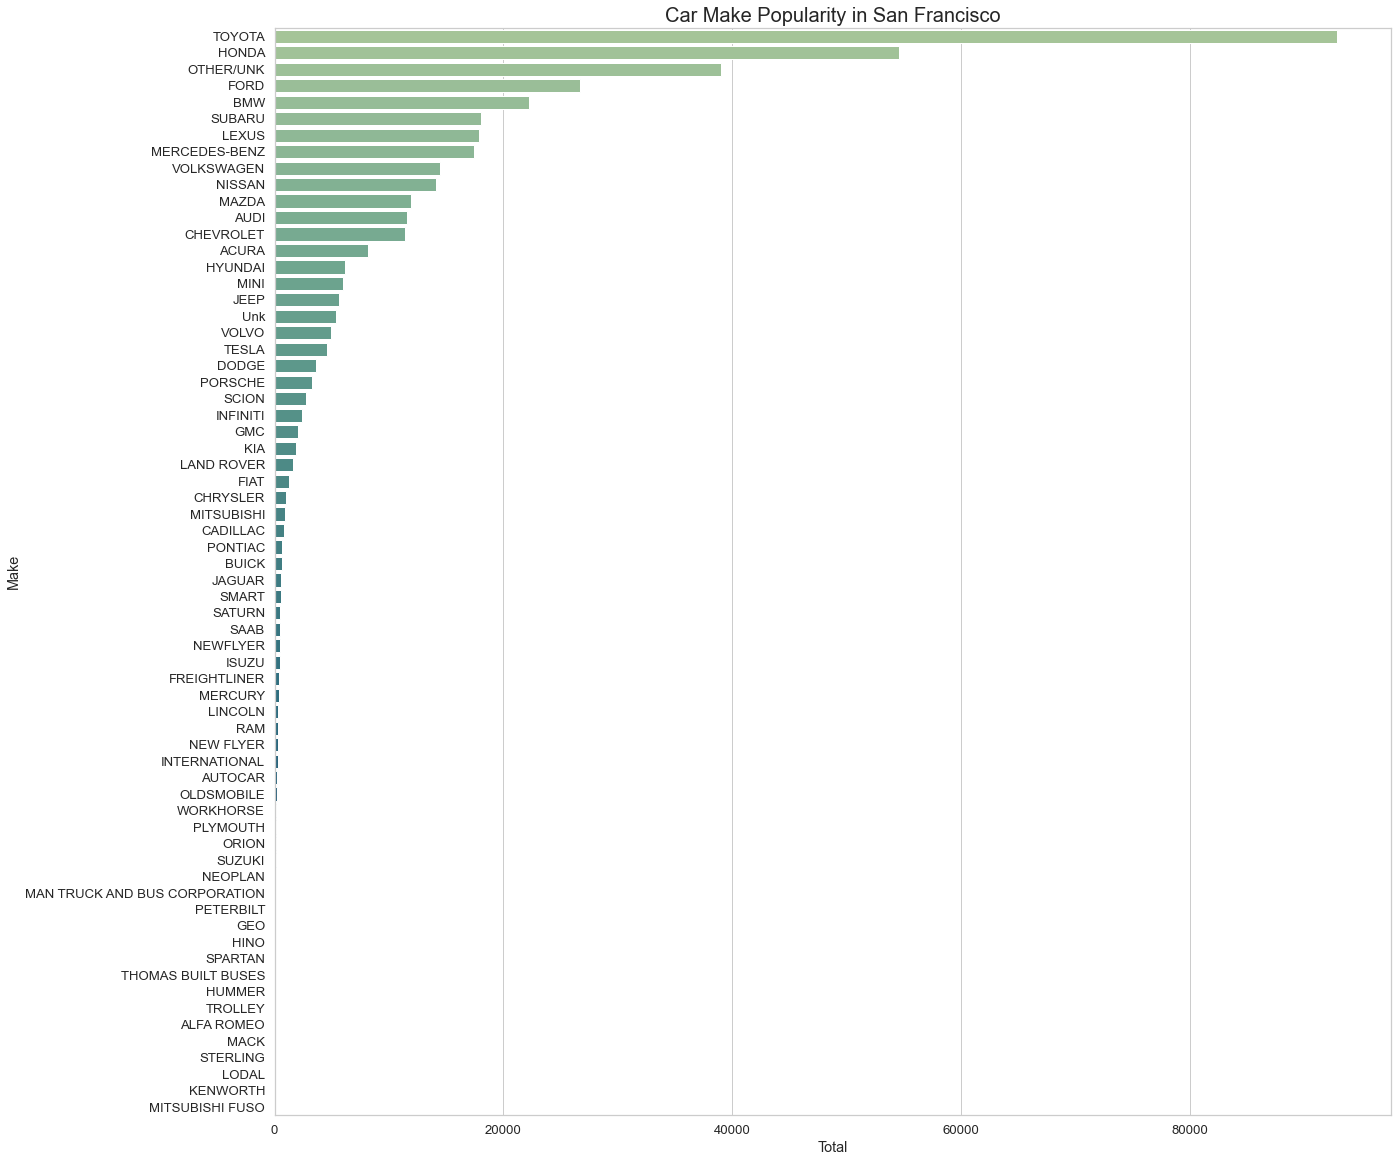

In [712]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", font_scale=1.2)
sns.barplot(x="Total", y="Make", data=makes.sort_values("Total", ascending=False), palette='crest')
plt.title('Car Make Popularity in San Francisco', fontsize=20)
plt.show();

> Toyota is the clear winner amongst San Franciscans, with Honda in second place.

### ii. Vehicles by Fuel Type

In [713]:
fuel = df1.groupby('Fuel').agg({'Vehicles': ['sum']})
fuel.head()

,Vehicles
,sum
Fuel,
Battery Electric,8269
Diesel and Diesel Hybrid,9246
Flex-Fuel,8551
Gasoline,358821
Hybrid Gasoline,32903


In [714]:
# rename columns
fuel.columns = ['Total']

# reset index to get grouped columns back
fuel = fuel.reset_index()

#Sort and Reset Index
fuel.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Fuel,Total
0,Gasoline,358821
1,Hybrid Gasoline,32903
2,Diesel and Diesel Hybrid,9246
3,Flex-Fuel,8551
4,Battery Electric,8269
5,Plug-in Hybrid,4492
6,Natural Gas,376
7,Hydrogen Fuel Cell,97
8,Other,33


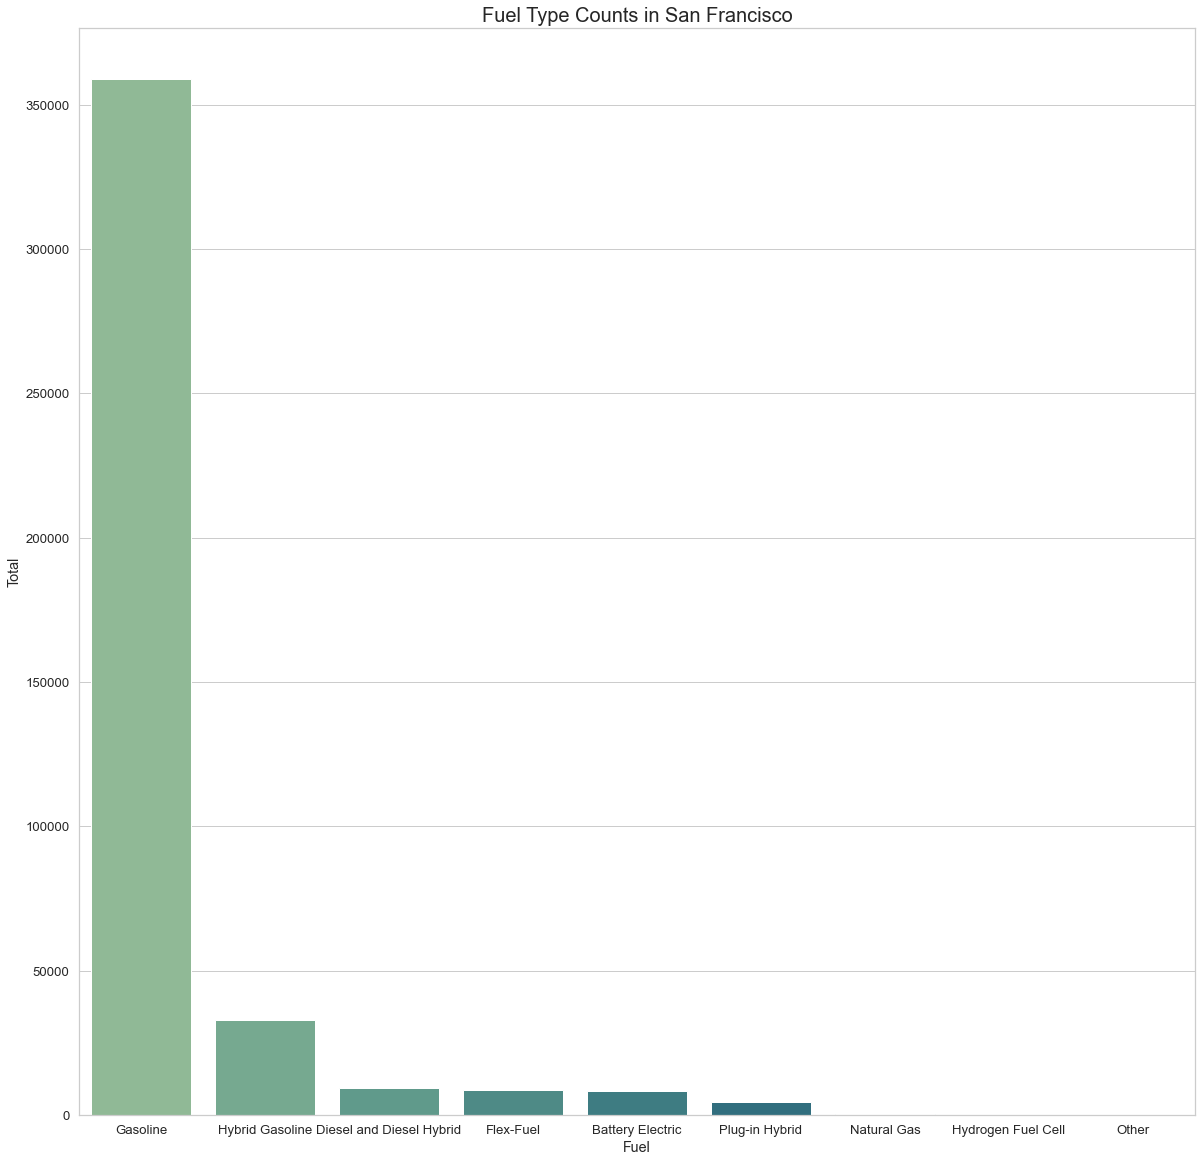

In [715]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", font_scale=1.2)
sns.barplot(y="Total", x="Fuel", data=fuel.sort_values("Total", ascending=False), palette='crest')
plt.title('Fuel Type Counts in San Francisco', fontsize=20)

plt.show();

> Hybrids and electric vehicles are lagging far behind gasoline vehicles.

### iii. Vehicles by Neighborhood

In [716]:
nhood = df1.groupby('Neighborhood').agg({'Vehicles': ['sum']})
nhood.head()

,Vehicles
,sum
Neighborhood,
Bayview-Hunters Point,33874
Castro/Noe Valley,17192
Chinatown,3423
Haight-Ashbury,16848
Hayes Valley/Tenderloin/North of Market,8352


In [717]:
# rename columns
nhood.columns = ['Total']

# reset index to get grouped columns back
nhood = nhood.reset_index()

#Sort and Reset Index
nhood.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Neighborhood,Total
0,Ingelside-Excelsior/Crocker-Amazon,47062
1,Bayview-Hunters Point,33874
2,Sunset,32387
3,Inner Mission/Bernal Heights,31969
4,Parkside/Forest Hill,27986
5,Visitacion Valley/Sunnydale,26188
6,Outer Richmond,22765
7,Inner Richmond,20773
8,Polk/Russian Hill (Nob Hill),18621
9,Twin Peaks-Glen Park,17446


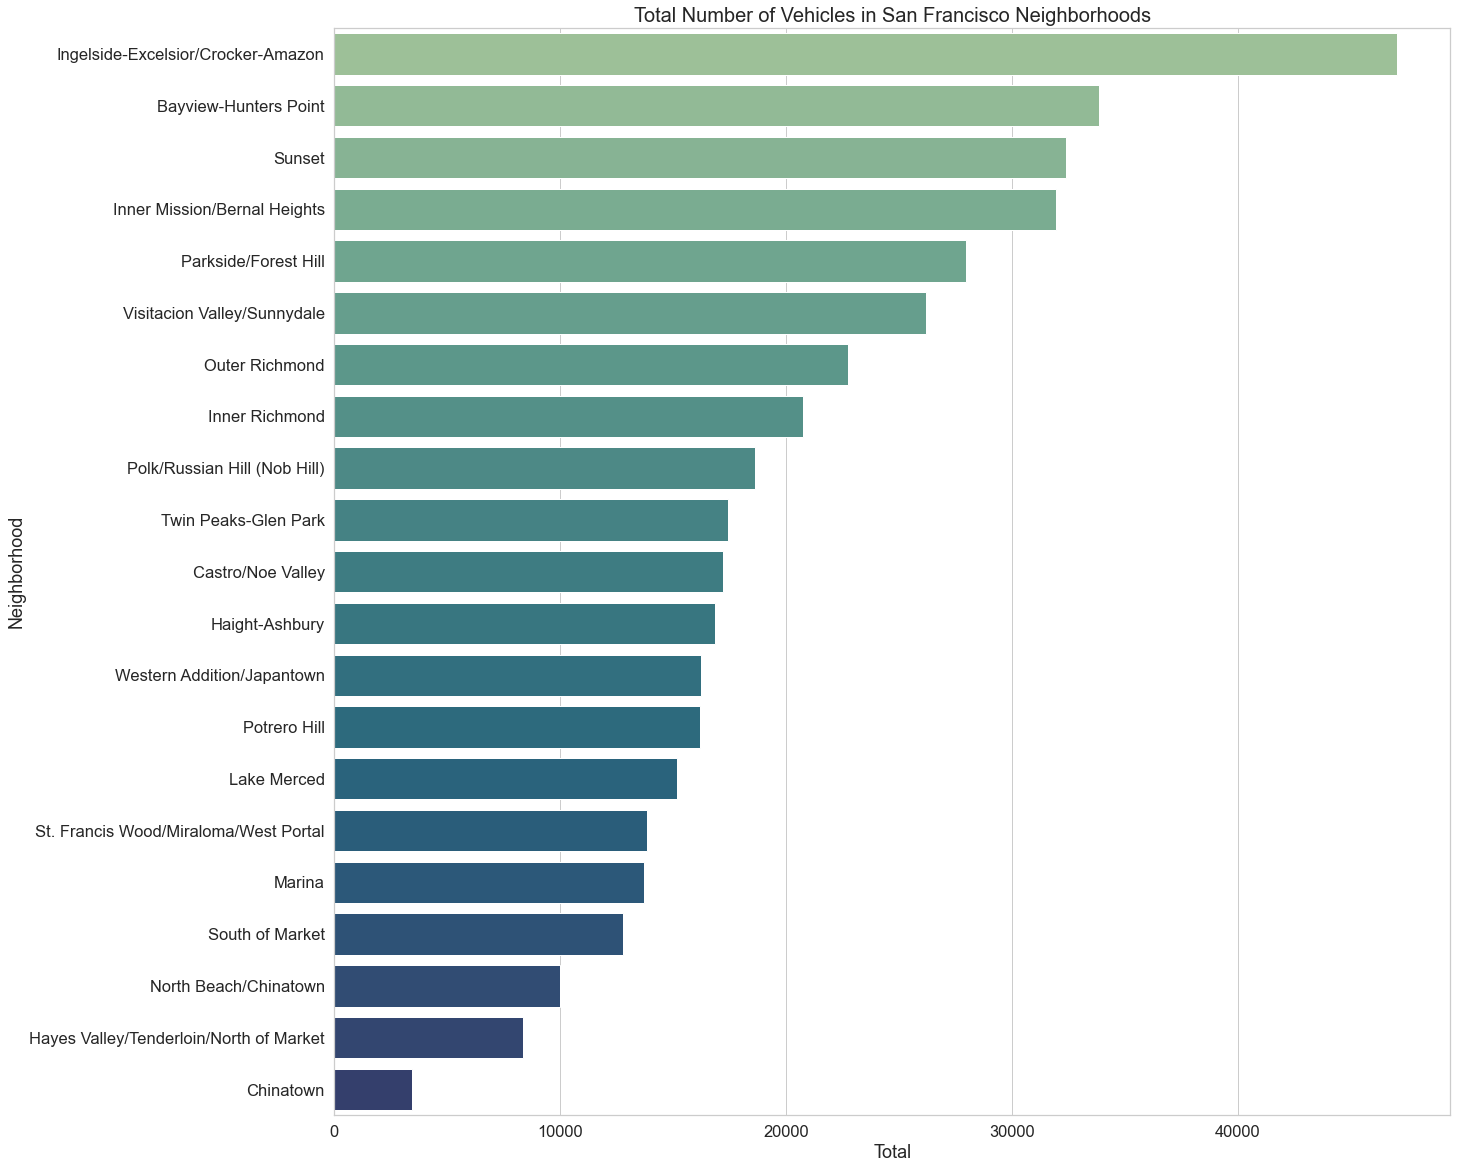

In [718]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", font_scale=1.5)
plt.title('Total Number of Vehicles in San Francisco Neighborhoods', fontsize=20)
sns.barplot(x="Total", y="Neighborhood", data=nhood.sort_values("Total", ascending=False), palette='crest')
plt.show();

> Ingleside-Excelsior and Bayview/Hunters Point have the most vehicles: These neighborhoods are less accessible by public transit, and tend to be lower income.

> Chinatown has the lowest number of vehicles.

### iv. Electric vs Gas Vehicles by Neighborhood

Finally! I get to answer my initial question: Which SF neighborhood has the most electric vehicles?

In [719]:
df2 = df1.copy()

In [720]:
df2['Fuel'].value_counts()

Gasoline                    5768
Hybrid Gasoline              854
Diesel and Diesel Hybrid     732
Flex-Fuel                    550
Battery Electric             372
Plug-in Hybrid               273
Natural Gas                   78
Hydrogen Fuel Cell            48
Other                         20
Name: Fuel, dtype: int64

In [721]:
df2.shape

(8695, 8)

In [722]:
df3 = df2[~df2['Fuel'].str.contains("Other")]

In [723]:
df3.shape

(8675, 8)

In [724]:
df3['Fuel'].value_counts()

Gasoline                    5768
Hybrid Gasoline              854
Diesel and Diesel Hybrid     732
Flex-Fuel                    550
Battery Electric             372
Plug-in Hybrid               273
Natural Gas                   78
Hydrogen Fuel Cell            48
Name: Fuel, dtype: int64

In [725]:
df3['FuelType'] = df3['Fuel'].apply(lambda x: 'Gasoline' if x == 'Gasoline' else 'NotGasoline')

In [726]:
df3.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood,FuelType
473,1/1/2020,94107,2007,Gasoline,ACURA,Light,16,Potrero Hill,Gasoline
474,1/1/2020,94109,2007,Gasoline,ACURA,Light,20,Polk/Russian Hill (Nob Hill),Gasoline
475,1/1/2020,94110,2007,Gasoline,ACURA,Light,29,Inner Mission/Bernal Heights,Gasoline
476,1/1/2020,94112,2007,Gasoline,ACURA,Light,63,Ingelside-Excelsior/Crocker-Amazon,Gasoline
477,1/1/2020,94114,2007,Gasoline,ACURA,Light,16,Castro/Noe Valley,Gasoline


In [727]:
nhoodFuels = df3.groupby(['Neighborhood', 'FuelType']).agg({'Vehicles': ['sum']})
nhoodFuels.head()

Vehicles
                                       sum
Neighborhood          FuelType            
Bayview-Hunters Point Gasoline       24982
                      NotGasoline     8890
Castro/Noe Valley     Gasoline       14250
                      NotGasoline     2942
Chinatown             Gasoline        2937

In [728]:
nhoodFuels.sort_index(inplace=True)
nhoodFuels.head()

Vehicles
                                       sum
Neighborhood          FuelType            
Bayview-Hunters Point Gasoline       24982
                      NotGasoline     8890
Castro/Noe Valley     Gasoline       14250
                      NotGasoline     2942
Chinatown             Gasoline        2937

In [729]:
nhoodFuels.reset_index(inplace=True)
nhoodFuels.head(2)

,Neighborhood,FuelType,Vehicles
,,,sum
0,Bayview-Hunters Point,Gasoline,24982
1,Bayview-Hunters Point,NotGasoline,8890


In [730]:
nhoodFuels.columns

MultiIndex([('Neighborhood',    ''),
            (    'FuelType',    ''),
            (    'Vehicles', 'sum')],
           )

In [731]:
nhoodFuels.columns = ['Neighborhood','FuelType','Vehicles']

In [732]:
nhoodFuels.head(2)

,Neighborhood,FuelType,Vehicles
0,Bayview-Hunters Point,Gasoline,24982
1,Bayview-Hunters Point,NotGasoline,8890


In [733]:
nhoodFuels['Proportion'] = nhoodFuels.groupby('Neighborhood')['Vehicles'].transform('sum')

In [734]:
nhoodFuels.head(2)

,Neighborhood,FuelType,Vehicles,Proportion
0,Bayview-Hunters Point,Gasoline,24982,33872
1,Bayview-Hunters Point,NotGasoline,8890,33872


In [735]:
nhoodFuels['Proportion'] = nhoodFuels['Vehicles'] / nhoodFuels['Proportion']

In [736]:
nhoodFuels.head(5)

,Neighborhood,FuelType,Vehicles,Proportion
0,Bayview-Hunters Point,Gasoline,24982,0.737541
1,Bayview-Hunters Point,NotGasoline,8890,0.262459
2,Castro/Noe Valley,Gasoline,14250,0.828874
3,Castro/Noe Valley,NotGasoline,2942,0.171126
4,Chinatown,Gasoline,2937,0.858270


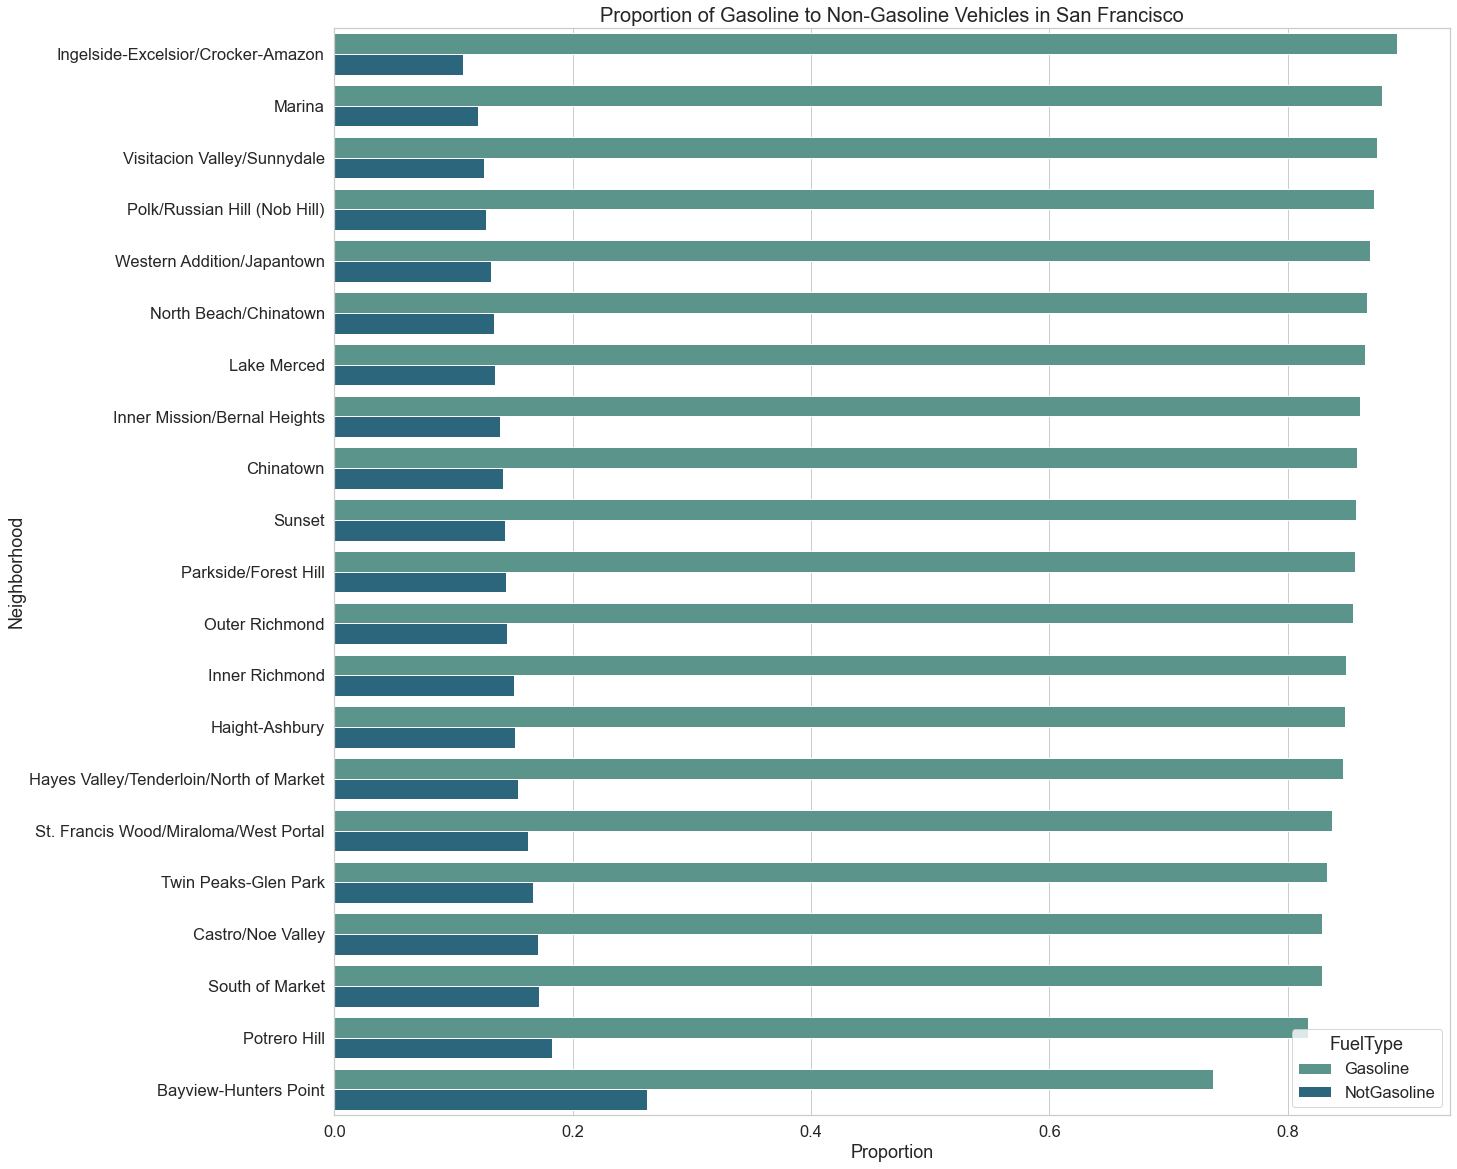

In [737]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", font_scale=1.5)
sns.barplot(x="Proportion", y="Neighborhood", hue="FuelType", data=nhoodFuels.sort_values("Proportion", ascending=False), palette='crest')
plt.title('Proportion of Gasoline to Non-Gasoline Vehicles in San Francisco', fontsize=20)
plt.show();

### v. Electric Vehicles by Neighborhood

In [738]:
lx = df2[df2['Fuel'].str.contains("Battery Electric")]
lx.head()

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles,Neighborhood
54406,1/1/2020,94103,2008,Battery Electric,OTHER/UNK,Light,1,South of Market
54408,1/1/2020,94107,2008,Battery Electric,OTHER/UNK,Light,1,Potrero Hill
54409,1/1/2020,94110,2008,Battery Electric,OTHER/UNK,Light,1,Inner Mission/Bernal Heights
54410,1/1/2020,94112,2008,Battery Electric,OTHER/UNK,Light,1,Ingelside-Excelsior/Crocker-Amazon
54411,1/1/2020,94115,2008,Battery Electric,OTHER/UNK,Light,3,Western Addition/Japantown


In [739]:
lx['Make'].unique()

array(['OTHER/UNK', 'NISSAN', 'TESLA', 'NEWFLYER', 'SMART', 'FIAT',
       'VOLKSWAGEN', 'CHEVROLET', 'Unk', 'NEW FLYER', 'TROLLEY'],
      dtype=object)

In [740]:
lx1 = lx.groupby(['Neighborhood']).agg({'Vehicles': ['sum']}).reset_index()
lx1.head()

,Neighborhood,Vehicles
,,sum
0,Bayview-Hunters Point,567
1,Castro/Noe Valley,624
2,Chinatown,49
3,Haight-Ashbury,430
4,Hayes Valley/Tenderloin/North of Market,133


In [741]:
lx1.columns = ['Neighborhood', 'Total']

In [742]:
lx1.head()

,Neighborhood,Total
0,Bayview-Hunters Point,567
1,Castro/Noe Valley,624
2,Chinatown,49
3,Haight-Ashbury,430
4,Hayes Valley/Tenderloin/North of Market,133


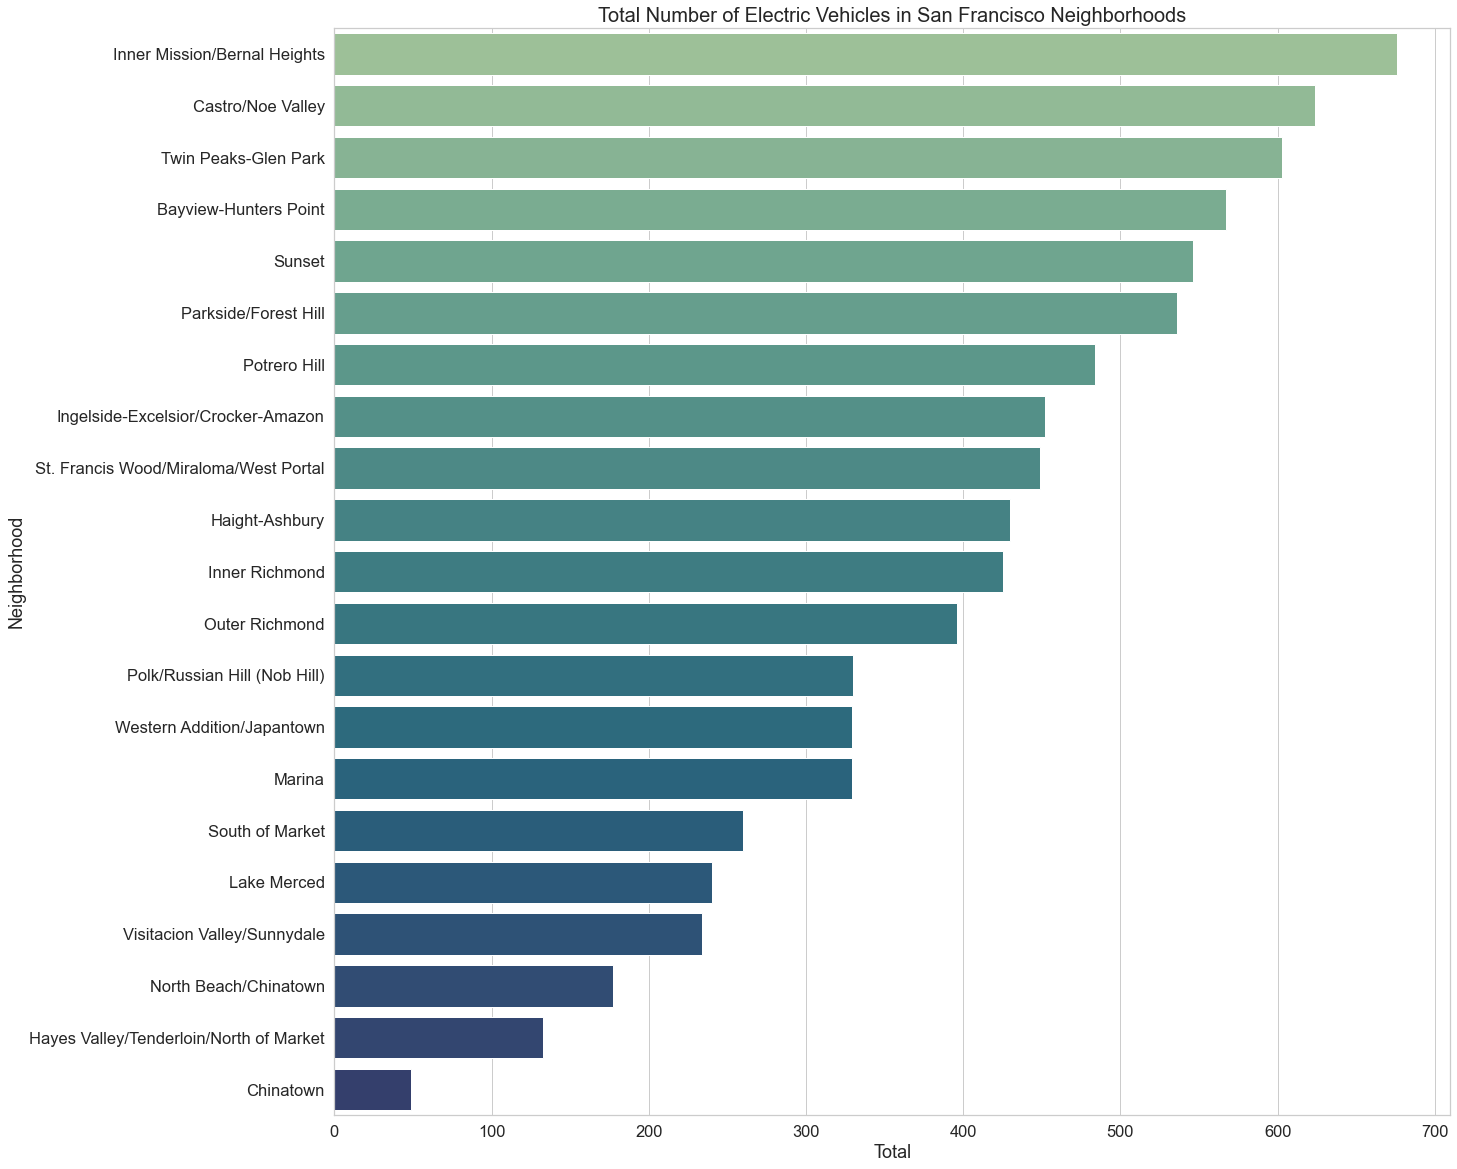

In [743]:
plt.figure(figsize=(20,20))
sns.color_palette("crest", as_cmap=True)
sns.set(style="whitegrid", font_scale=1.5)
plt.title('Total Number of Electric Vehicles in San Francisco Neighborhoods', fontsize=20)
sns.barplot(x="Total", y="Neighborhood", data=lx1.sort_values("Total", ascending=False), palette='crest')
plt.show();

### vi. Electric Vehicle Makes in San Francisco

In [744]:
lx2 = lx.groupby(['Make']).agg({'Vehicles': ['sum']}).reset_index()
lx2.head()

,Make,Vehicles
,,sum
0,CHEVROLET,653
1,FIAT,45
2,NEW FLYER,139
3,NEWFLYER,91
4,NISSAN,64


In [745]:
lx2.columns = ['Make', 'Total']

In [746]:
lx2.sort_values(by=['Total'], ascending=False)

,Make,Total
7,TESLA,4622
5,OTHER/UNK,2466
0,CHEVROLET,653
2,NEW FLYER,139
3,NEWFLYER,91
10,VOLKSWAGEN,88
4,NISSAN,64
6,SMART,47
1,FIAT,45
8,TROLLEY,28


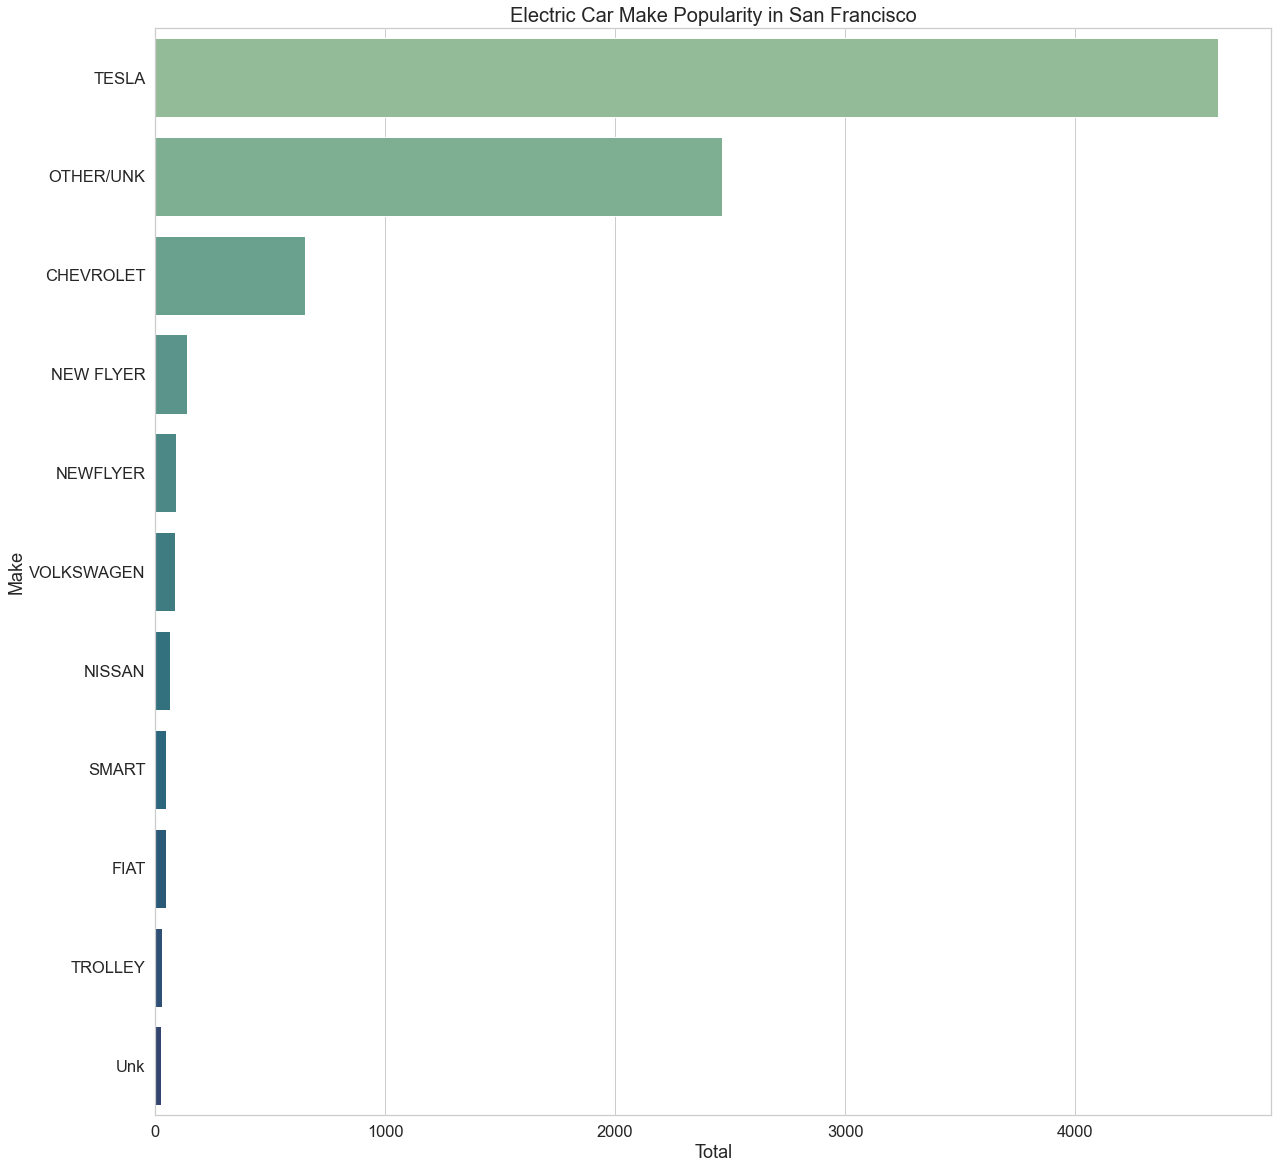

In [747]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", font_scale=1.5)
sns.barplot(x="Total", y="Make", data=lx2.sort_values("Total", ascending=False), palette='crest')
plt.title('Electric Car Make Popularity in San Francisco', fontsize=20)
plt.show();

In [749]:
#Import Map
bay_df = gpd.read_file("geodata/geo_export_7f282eb3-1fca-405b-b41d-1b8a2ebc43a8.shp")

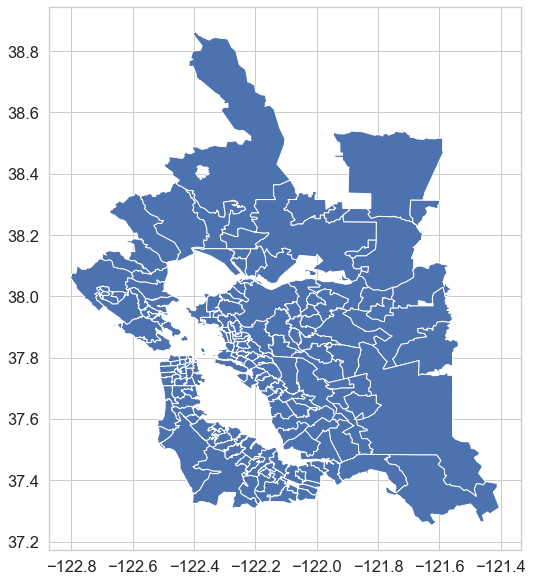

In [750]:
##Plot Map
bay_df.plot(figsize=(10, 10))

plt.show();

In [751]:
bay_df.head()

,area,length,po_name,state,zip,geometry
0,1.231326e+10,995176.225313,NAPA,CA,94558,"POLYGON ((-122.10329 38.51328, -122.10348 38.5..."
1,9.917861e+08,200772.556587,FAIRFIELD,CA,94533,"POLYGON ((-121.94748 38.30151, -121.94718 38.2..."
2,7.236950e+09,441860.201400,DIXON,CA,95620,"POLYGON ((-121.65336 38.31339, -121.69340 38.3..."
3,3.001414e+09,311318.546326,SONOMA,CA,95476,"POLYGON ((-122.40684 38.15568, -122.40757 38.1..."
4,1.194302e+09,359104.646602,NAPA,CA,94559,"POLYGON ((-122.29369 38.15524, -122.29850 38.1..."


In [752]:
bounds = bay_df.geometry.total_bounds
bounds

array([-122.804417,   37.25219 , -121.403842,   38.864245])

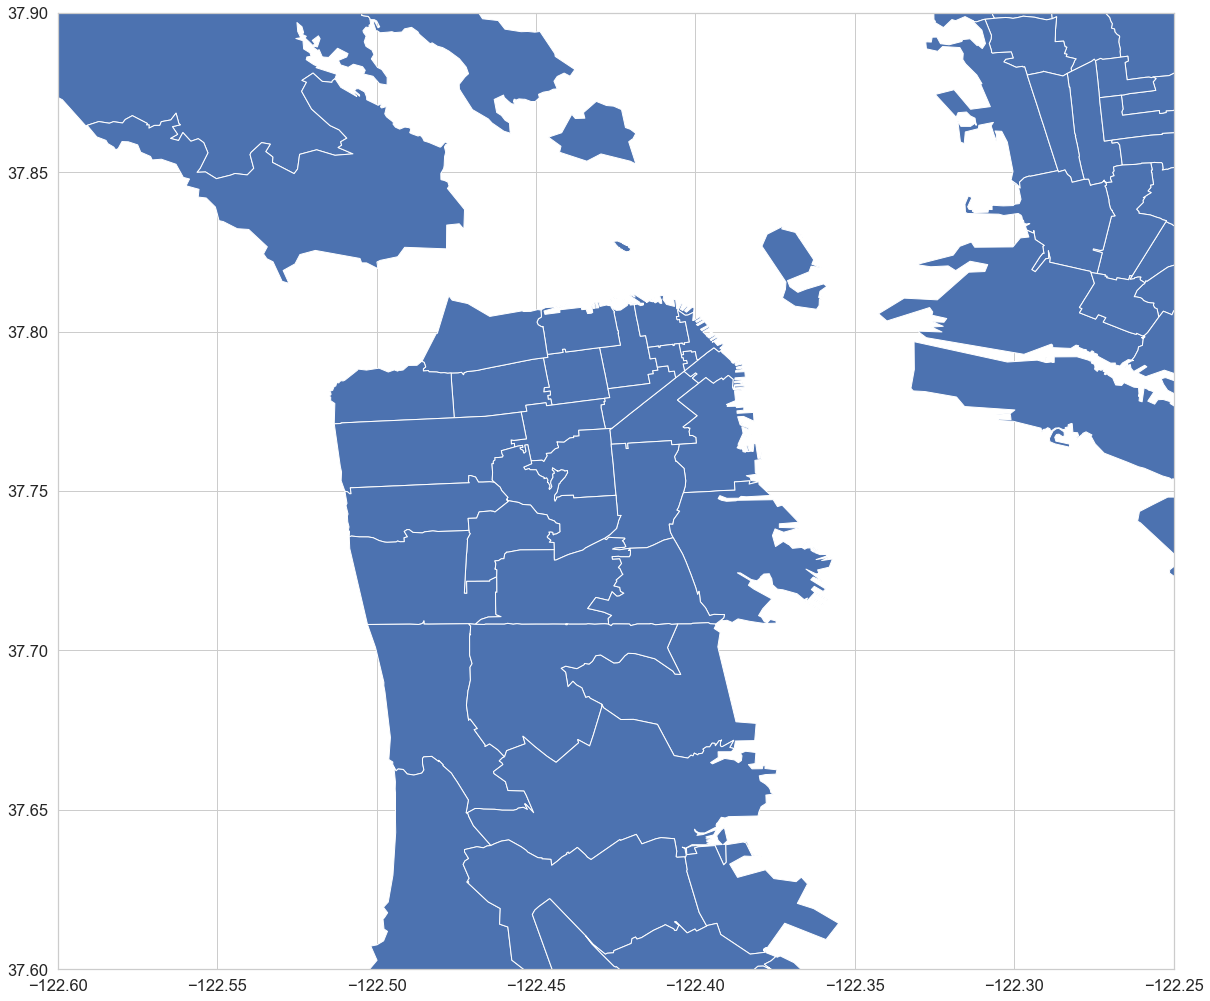

In [753]:
minx, miny, maxx, maxy = bay_df.total_bounds

ax = bay_df.plot(figsize=(20,20))
ax.set_xlim(-122.6, -122.25)
ax.set_ylim(37.6, 37.9)
plt.show();

In [754]:
bay_df['Neighborhood'] = bay_df['zip'].map(zip_dict)
bay_df.head()

,area,length,po_name,state,zip,geometry,Neighborhood
0,1.231326e+10,995176.225313,NAPA,CA,94558,"POLYGON ((-122.10329 38.51328, -122.10348 38.5...",NaN
1,9.917861e+08,200772.556587,FAIRFIELD,CA,94533,"POLYGON ((-121.94748 38.30151, -121.94718 38.2...",NaN
2,7.236950e+09,441860.201400,DIXON,CA,95620,"POLYGON ((-121.65336 38.31339, -121.69340 38.3...",NaN
3,3.001414e+09,311318.546326,SONOMA,CA,95476,"POLYGON ((-122.40684 38.15568, -122.40757 38.1...",NaN
4,1.194302e+09,359104.646602,NAPA,CA,94559,"POLYGON ((-122.29369 38.15524, -122.29850 38.1...",NaN


In [755]:
bay_df.dropna(inplace=True)

In [756]:
#Merge Dataframes
merged = bay_df.set_index("Neighborhood").join(lx1.set_index("Neighborhood"))

merged.head()

,area,length,po_name,state,zip,geometry,Total
Neighborhood,,,,,,,
South of Market,3.690611e+07,33638.933160,SAN FRANCISCO,CA,94103,"POLYGON ((-122.42641 37.76467, -122.42653 37.7...",260
Polk/Russian Hill (Nob Hill),2.923981e+07,30323.948555,SAN FRANCISCO,CA,94109,"POLYGON ((-122.41195 37.78886, -122.41188 37.7...",330
Western Addition/Japantown,3.056166e+07,24300.439024,SAN FRANCISCO,CA,94115,"POLYGON ((-122.42851 37.77906, -122.42998 37.7...",329
Inner Richmond,4.612865e+07,31063.661554,SAN FRANCISCO,CA,94118,"POLYGON ((-122.45466 37.77478, -122.45628 37.7...",425
Marina,3.160277e+07,38751.405184,SAN FRANCISCO,CA,94123,"POLYGON ((-122.44644 37.79285, -122.44675 37.7...",329


In [757]:
merged.reset_index()

,Neighborhood,area,length,po_name,state,zip,geometry,Total
0,South of Market,3.690611e+07,33638.933160,SAN FRANCISCO,CA,94103,"POLYGON ((-122.42641 37.76467, -122.42653 37.7...",260
1,Polk/Russian Hill (Nob Hill),2.923981e+07,30323.948555,SAN FRANCISCO,CA,94109,"POLYGON ((-122.41195 37.78886, -122.41188 37.7...",330
2,Western Addition/Japantown,3.056166e+07,24300.439024,SAN FRANCISCO,CA,94115,"POLYGON ((-122.42851 37.77906, -122.42998 37.7...",329
3,Inner Richmond,4.612865e+07,31063.661554,SAN FRANCISCO,CA,94118,"POLYGON ((-122.45466 37.77478, -122.45628 37.7...",425
4,Marina,3.160277e+07,38751.405184,SAN FRANCISCO,CA,94123,"POLYGON ((-122.44644 37.79285, -122.44675 37.7...",329
5,North Beach/Chinatown,2.155245e+07,43114.362360,SAN FRANCISCO,CA,94133,"MULTIPOLYGON (((-122.41920 37.80846, -122.4179...",177
6,Outer Richmond,6.079038e+07,34650.040397,SAN FRANCISCO,CA,94121,"POLYGON ((-122.47564 37.77297, -122.47672 37.7...",396
7,Hayes Valley/Tenderloin/North of Market,1.874065e+07,23624.308597,SAN FRANCISCO,CA,94102,"POLYGON ((-122.40608 37.78561, -122.40759 37.7...",133
8,Chinatown,7.705085e+06,14174.111829,SAN FRANCISCO,CA,94108,"POLYGON ((-122.40355 37.78757, -122.40608 37.7...",49
9,Haight-Ashbury,3.395448e+07,33260.744290,SAN FRANCISCO,CA,94117,"POLYGON ((-122.45668 37.76381, -122.45676 37.7...",430


In [758]:
bay_df["center"] = bay_df["geometry"].centroid
bay_df_points = bay_df.copy()
bay_df_points.set_geometry("center", inplace = True)

In [759]:
bay_df.head()

,area,length,po_name,state,zip,geometry,Neighborhood,center
23,3.690611e+07,33638.933160,SAN FRANCISCO,CA,94103,"POLYGON ((-122.42641 37.76467, -122.42653 37.7...",South of Market,POINT (-122.41126 37.77314)
36,2.923981e+07,30323.948555,SAN FRANCISCO,CA,94109,"POLYGON ((-122.41195 37.78886, -122.41188 37.7...",Polk/Russian Hill (Nob Hill),POINT (-122.42120 37.79311)
53,3.056166e+07,24300.439024,SAN FRANCISCO,CA,94115,"POLYGON ((-122.42851 37.77906, -122.42998 37.7...",Western Addition/Japantown,POINT (-122.43747 37.78589)
83,4.612865e+07,31063.661554,SAN FRANCISCO,CA,94118,"POLYGON ((-122.45466 37.77478, -122.45628 37.7...",Inner Richmond,POINT (-122.46122 37.78186)
95,3.160277e+07,38751.405184,SAN FRANCISCO,CA,94123,"POLYGON ((-122.44644 37.79285, -122.44675 37.7...",Marina,POINT (-122.43638 37.80077)


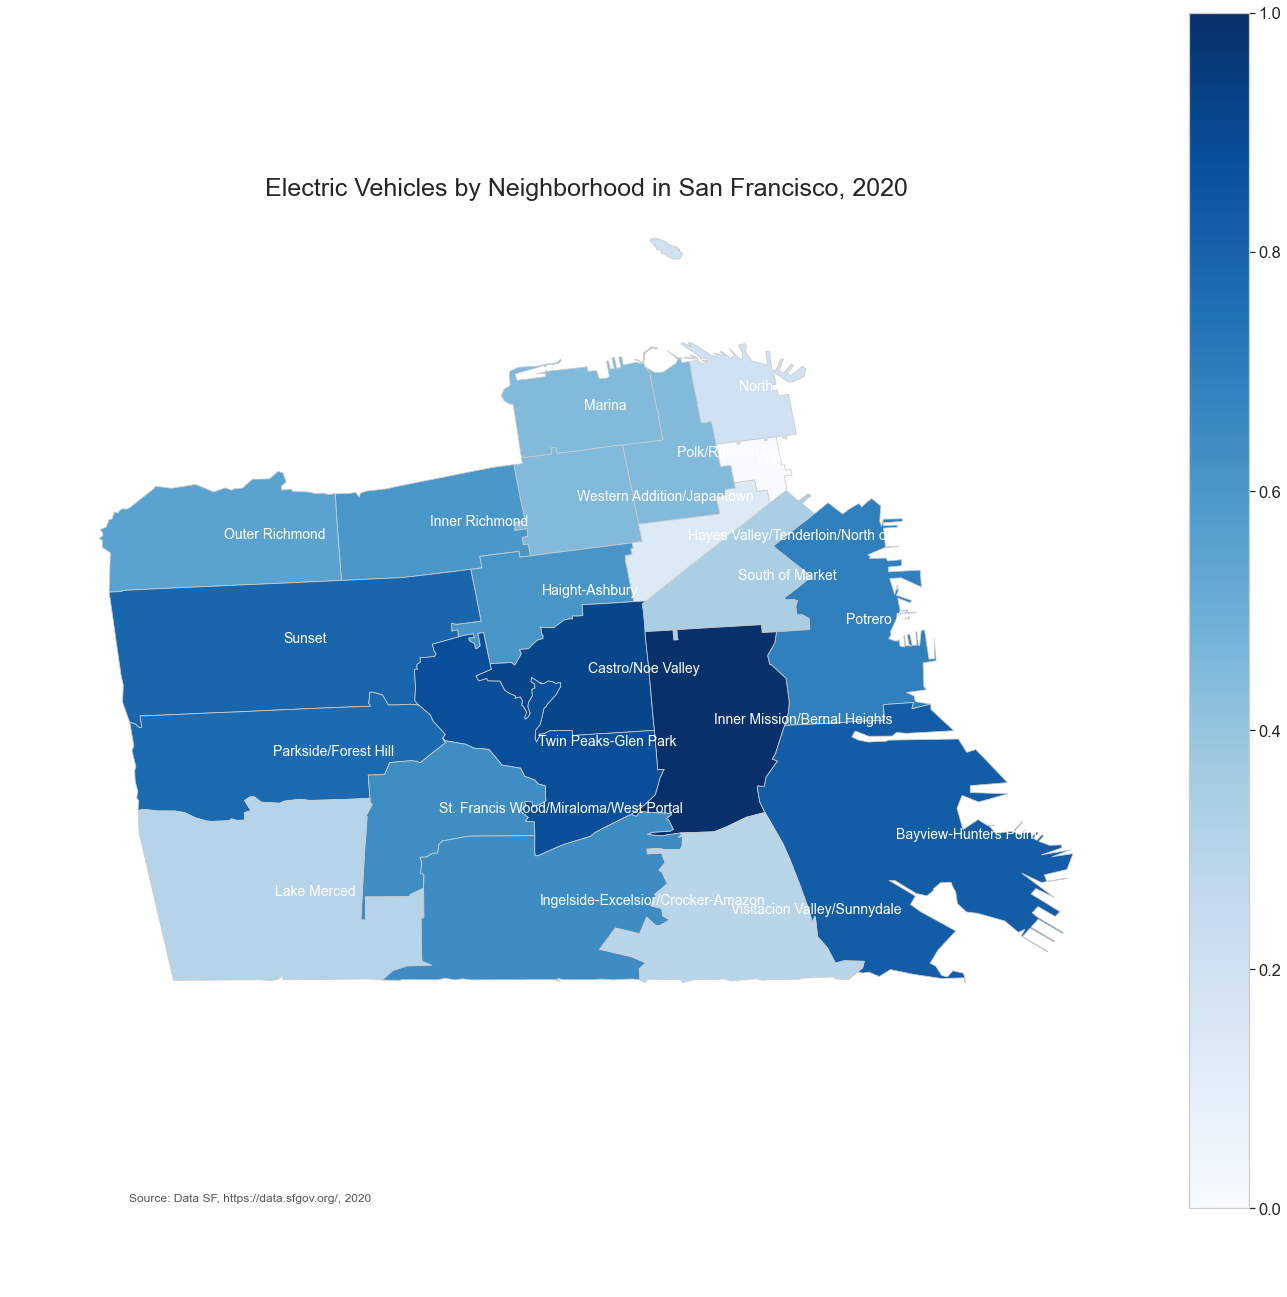

In [760]:
v = "Total"
fig, ax = plt.subplots(1, figsize=(24, 22))

merged.plot(column=v, cmap='Blues', linewidth=0.8, ax=ax, edgecolor="0.8")
ax.axis("off")

sm = plt.cm.ScalarMappable(cmap="Blues")

texts = []
for x, y, label in zip(bay_df_points.geometry.x, bay_df_points.geometry.y, bay_df_points["Neighborhood"]):
    texts.append(plt.text(x, y, label, fontsize = 14, color='white'))

ax.annotate("Source: Data SF, https://data.sfgov.org/, 2020",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment='top', fontsize=12, color="#555555")
ax.set_title("Electric Vehicles by Neighborhood in San Francisco, 2020", fontdict={'fontsize': '25', 'fontweight' : '3'})

sm._A = []
cbar = fig.colorbar(sm)
fig.savefig("map_export.png", dpi=300);